<a href="https://colab.research.google.com/github/jhlee508/Colab/blob/master/MLP_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MLP 모델에 학습 개선 방법 적용해보기**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [ ]:
def PlotAccuracy(history):
    sns.set_style('whitegrid')
    plt.figure(figsize=(12,5))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'test'])
    plt.show()

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
# split_train_valid & Normalizing
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify = y_train, random_state = 42)

In [ ]:
# Flatten
X_train = X_train.reshape(X_train.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train = X_train.astype("float64")/255
X_val = X_val.astype("float64")/255
X_test = X_test.astype("float64")/255

In [ ]:
# one hot encoding
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((48000, 784),
 (48000, 10),
 (12000, 784),
 (12000, 10),
 (10000, 784),
 (10000, 10))

# 1st Model
- 간단한 MLP 모델 생성

In [ ]:
# 모델 list
model_lst = pd.DataFrame(columns = ['model', 'acc', 'loss'])

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256, input_shape = (784,)))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Activation('sigmoid'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Activation('softmax'))

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 128, epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3524 - accuracy: 0.0966 - val_loss: 2.2973 - val_accuracy: 0.1123
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2963 - accuracy: 0.1197 - val_loss: 2.2939 - val_accuracy: 0.1250
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2933 - accuracy: 0.1163 - val_loss: 2.2899 - val_accuracy: 0.1123
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2891 - accuracy: 0.1170 - val_loss: 2.2856 - val_accuracy: 0.1123
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2846 - accuracy: 0.1215 - val_loss: 2.2807 - val_accuracy: 0.1268
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2802 - accuracy: 0.1570 - val_loss: 2.2753 - val_accuracy: 0.1520
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2736 - accuracy: 0.1529 - val_loss: 2.2690 - val_accuracy: 0.1924
Epoch 

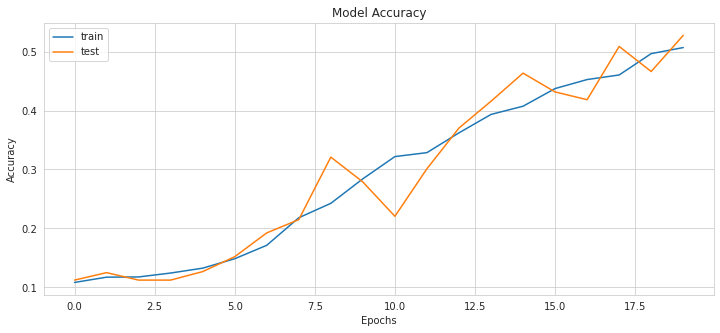

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'base', 'acc':model.evaluate(X_test, y_test)[1],'loss':model.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 0s 1ms/step - loss: 1.6278 - accuracy: 0.5260


,model,acc,loss
0,base,0.526,1.627769


# 2nd Model
- He 초기화 적용

In [ ]:
model_he = tf.keras.models.Sequential()

model_he.add(tf.keras.layers.Dense(256, input_shape = (784,)))
model_he.add(tf.keras.layers.Activation('sigmoid'))
model_he.add(tf.keras.layers.Dense(128, kernel_initializer='he_normal'))
model_he.add(tf.keras.layers.Activation('sigmoid'))
model_he.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal'))
model_he.add(tf.keras.layers.Activation('sigmoid'))
model_he.add(tf.keras.layers.Dense(10, kernel_initializer='he_normal'))
model_he.add(tf.keras.layers.Activation('softmax'))

model_he.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model_he.fit(X_train, y_train, 
                    batch_size = 128, epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 2.3591 - accuracy: 0.1082 - val_loss: 2.2947 - val_accuracy: 0.1123
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2932 - accuracy: 0.1171 - val_loss: 2.2881 - val_accuracy: 0.1124
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2863 - accuracy: 0.1262 - val_loss: 2.2814 - val_accuracy: 0.1761
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2796 - accuracy: 0.1570 - val_loss: 2.2732 - val_accuracy: 0.1127
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2715 - accuracy: 0.1634 - val_loss: 2.2641 - val_accuracy: 0.1187
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2617 - accuracy: 0.2077 - val_loss: 2.2527 - val_accuracy: 0.1534
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 2.2500 - accuracy: 0.2324 - val_loss: 2.2390 - val_accuracy: 0.2523
Epoch 

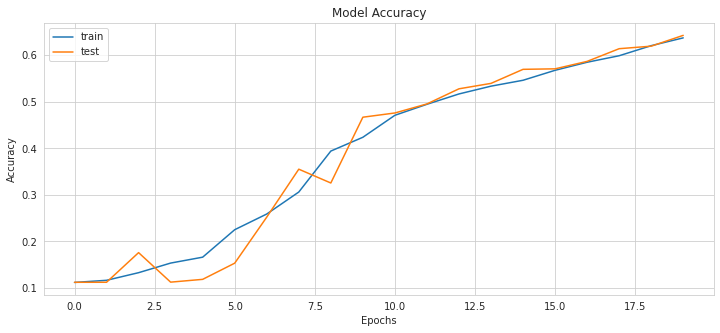

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'he_init', 'acc':model_he.evaluate(X_test, y_test)[1],'loss':model_he.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 0s 1ms/step - loss: 1.2802 - accuracy: 0.6551


,model,acc,loss
0,base,0.5260,1.627769
1,he_init,0.6551,1.280162


# 3rd Model
- Activation Function 수정

In [ ]:
model_ac = tf.keras.models.Sequential()

model_ac.add(tf.keras.layers.Dense(256, input_shape = (784,)))
model_ac.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_ac.add(tf.keras.layers.Dense(128))
model_ac.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_ac.add(tf.keras.layers.Dense(64))
model_ac.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model_ac.add(tf.keras.layers.Dense(10))
model_ac.add(tf.keras.layers.Activation('softmax'))

model_ac.compile(optimizer = tf.keras.optimizers.SGD(),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [ ]:
history = model_ac.fit(X_train, y_train, 
                       batch_size = 128, epochs = 20, 
                       validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 1.9171 - accuracy: 0.4098 - val_loss: 0.7156 - val_accuracy: 0.8112
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.6049 - accuracy: 0.8389 - val_loss: 0.4309 - val_accuracy: 0.8844
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3984 - accuracy: 0.8903 - val_loss: 0.3517 - val_accuracy: 0.9015
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.9031 - val_loss: 0.3160 - val_accuracy: 0.9096
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.3079 - accuracy: 0.9122 - val_loss: 0.2895 - val_accuracy: 0.9183
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2786 - accuracy: 0.9174 - val_loss: 0.2716 - val_accuracy: 0.9222
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.2571 - accuracy: 0.9264 - val_loss: 0.2575 - val_accuracy: 0.9263
Epoch 

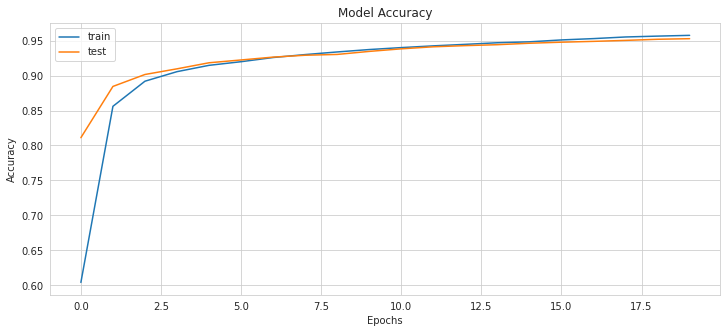

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'leaky_relu', 'acc':model_ac.evaluate(X_test, y_test)[1],'loss':model_ac.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 0s 1ms/step - loss: 0.1560 - accuracy: 0.9525


,model,acc,loss
0,base,0.5260,1.627769
1,he_init,0.6551,1.280162
2,leaky_relu,0.9525,0.156011


# 4th Model
- Optimizer 수정

In [ ]:
model_op = tf.keras.models.Sequential()

model_op.add(tf.keras.layers.Dense(256, input_shape = (784,)))
model_op.add(tf.keras.layers.Activation('relu'))
model_op.add(tf.keras.layers.Dense(128))
model_op.add(tf.keras.layers.Activation('relu'))
model_op.add(tf.keras.layers.Dense(64))
model_op.add(tf.keras.layers.Activation('relu'))
model_op.add(tf.keras.layers.Dense(10))
model_op.add(tf.keras.layers.Activation('softmax'))

model_op.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model_op.fit(X_train, y_train, 
                    batch_size = 128, epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 1s 2ms/step - loss: 0.5875 - accuracy: 0.8411 - val_loss: 0.1438 - val_accuracy: 0.9588
Epoch 2/20
375/375 [==============================] - 1s 2ms/step - loss: 0.1191 - accuracy: 0.9643 - val_loss: 0.1207 - val_accuracy: 0.9632
Epoch 3/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0744 - accuracy: 0.9775 - val_loss: 0.0997 - val_accuracy: 0.9705
Epoch 4/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9828 - val_loss: 0.0856 - val_accuracy: 0.9758
Epoch 5/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0861 - val_accuracy: 0.9757
Epoch 6/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0301 - accuracy: 0.9905 - val_loss: 0.0872 - val_accuracy: 0.9754
Epoch 7/20
375/375 [==============================] - 1s 2ms/step - loss: 0.0203 - accuracy: 0.9940 - val_loss: 0.0952 - val_accuracy: 0.9735
Epoch 

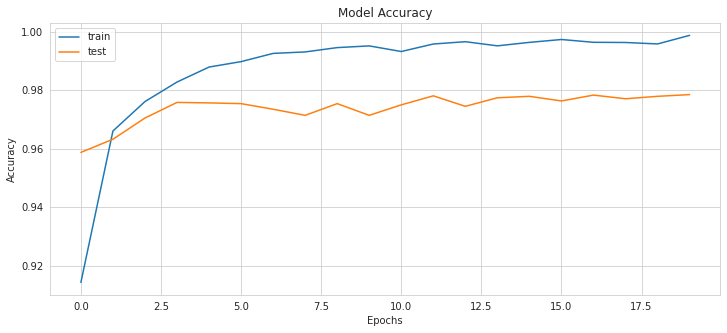

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'relu+Adam', 'acc':model_op.evaluate(X_test, y_test)[1],'loss':model_op.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 0s 1ms/step - loss: 0.1056 - accuracy: 0.9802


,model,acc,loss
0,base,0.5260,1.627769
1,he_init,0.6551,1.280162
2,leaky_relu,0.9525,0.156011
3,relu+Adam,0.9802,0.105635


# 5th Model
- Batch Normalization 추가

In [ ]:
model_bn = tf.keras.models.Sequential()

model_bn.add(tf.keras.layers.Dense(256, input_shape = (784,)))
model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Activation('relu'))
model_bn.add(tf.keras.layers.Dense(128))
model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Activation('relu'))
model_bn.add(tf.keras.layers.Dense(64))
model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Activation('relu'))
model_bn.add(tf.keras.layers.Dense(10))
model_bn.add(tf.keras.layers.Activation('softmax'))

model_bn.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model_bn.fit(X_train, y_train, 
                    batch_size = 128, epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.5124 - accuracy: 0.8614 - val_loss: 0.1347 - val_accuracy: 0.9613
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0944 - accuracy: 0.9729 - val_loss: 0.0929 - val_accuracy: 0.9744
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0518 - accuracy: 0.9846 - val_loss: 0.0886 - val_accuracy: 0.9728
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0869 - val_accuracy: 0.9755
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0255 - accuracy: 0.9923 - val_loss: 0.0848 - val_accuracy: 0.9753
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9936 - val_loss: 0.0912 - val_accuracy: 0.9742
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.0972 - val_accuracy: 0.9747
Epoch 

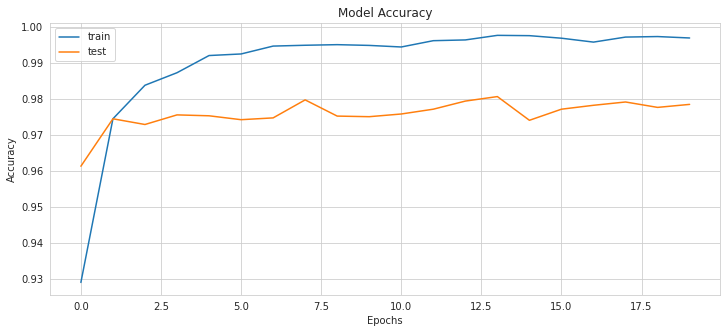

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'relu+Adam+BN', 'acc':model_bn.evaluate(X_test, y_test)[1],'loss':model_bn.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 1s 2ms/step - loss: 0.0896 - accuracy: 0.9786


,model,acc,loss
0,base,0.5260,1.627769
1,he_init,0.6551,1.280162
2,leaky_relu,0.9525,0.156011
3,relu+Adam,0.9802,0.105635
4,relu+Adam+BN,0.9786,0.089612


# 6th Model
- Dropout 추가

In [ ]:
model_do = tf.keras.models.Sequential()

model_do.add(tf.keras.layers.Dense(256, input_shape = (784, )))
model_do.add(tf.keras.layers.BatchNormalization())
model_do.add(tf.keras.layers.Dense(128))
model_do.add(tf.keras.layers.BatchNormalization())
model_do.add(tf.keras.layers.Activation('relu'))
model_do.add(tf.keras.layers.Dropout(0.2))  
model_do.add(tf.keras.layers.Dense(64))
model_do.add(tf.keras.layers.BatchNormalization())
model_do.add(tf.keras.layers.Activation('relu'))
model_do.add(tf.keras.layers.Dropout(0.2))
model_do.add(tf.keras.layers.Dense(10))
model_do.add(tf.keras.layers.Activation('softmax'))

model_do.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model_do.fit(X_train, y_train, 
                    batch_size = 128, epochs = 20, 
                    validation_data = (X_val, y_val))

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.7083 - accuracy: 0.7956 - val_loss: 0.1800 - val_accuracy: 0.9476
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2240 - accuracy: 0.9353 - val_loss: 0.1342 - val_accuracy: 0.9588
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9495 - val_loss: 0.1055 - val_accuracy: 0.9671
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1359 - accuracy: 0.9585 - val_loss: 0.1052 - val_accuracy: 0.9677
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1255 - accuracy: 0.9614 - val_loss: 0.0941 - val_accuracy: 0.9718
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1135 - accuracy: 0.9652 - val_loss: 0.0871 - val_accuracy: 0.9726
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1028 - accuracy: 0.9678 - val_loss: 0.0910 - val_accuracy: 0.9718
Epoch 

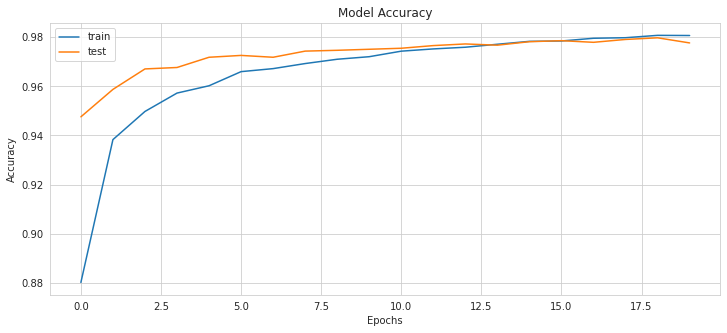

In [ ]:
PlotAccuracy(history)

In [ ]:
model_lst = model_lst.append({'model':'relu+Adam+BN+DO', 'acc':model_do.evaluate(X_test, y_test)[1],'loss':model_do.evaluate(X_test, y_test, verbose=0)[0]}, ignore_index=True)
model_lst

313/313 [==============================] - 1s 2ms/step - loss: 0.0736 - accuracy: 0.9802


,model,acc,loss
0,base,0.5260,1.627769
1,he_init,0.6551,1.280162
2,leaky_relu,0.9525,0.156011
3,relu+Adam,0.9802,0.105635
4,relu+Adam+BN,0.9786,0.089612
5,relu+Adam+BN+DO,0.9802,0.073596
